In [1]:
import matplotlib
import numpy as np
import pandas as pd
import itertools
import time

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# New Library, need to use original_flavor to import candlestick_ohlc
from mplfinance.original_flavor import candlestick_ohlc


In [2]:
class MeasureTime:
    def __init__(self):
        self.start = time.time()
    def kill(self):
        print ('Time elapsed: ' + time.strftime("%H:%M:%S", time.gmtime(time.time()-self.start)))
        del self

In [3]:
#Notebook_timer = MeasureTime()

In [4]:
#Notebook_timer.kill()


In [5]:
my_dataset = pd.read_csv(('SPX.csv'), header=(1))

# Review the DataFrame
my_dataset

,time,open,high,low,close,Volume
0,2021-02-25T15:30:00-05:00,3828.66,3844.93,3814.04,3829.33,0
1,2021-02-26T09:30:00-05:00,3847.85,3853.29,3789.54,3790.45,0
2,2021-02-26T10:30:00-05:00,3790.71,3842.54,3790.71,3824.71,0
3,2021-02-26T11:30:00-05:00,3824.46,3861.08,3823.66,3852.79,0
4,2021-02-26T12:30:00-05:00,3852.77,3857.82,3833.23,3850.70,0
...,...,...,...,...,...,...
2793,2022-09-27T11:30:00-04:00,3665.34,3672.25,3626.16,3635.81,287128470
2794,2022-09-27T12:30:00-04:00,3635.86,3644.03,3628.97,3633.21,241359220
2795,2022-09-27T13:30:00-04:00,3633.20,3639.86,3623.29,3635.43,238132310
2796,2022-09-27T14:30:00-04:00,3635.45,3659.22,3631.57,3644.06,308224350


In [6]:
del my_dataset['time']
del my_dataset['Volume']

In [7]:
my_dataset.head(5)


,open,high,low,close
0,3828.66,3844.93,3814.04,3829.33
1,3847.85,3853.29,3789.54,3790.45
2,3790.71,3842.54,3790.71,3824.71
3,3824.46,3861.08,3823.66,3852.79
4,3852.77,3857.82,3833.23,3850.70


In [8]:
def graph_data_ohlc(dataset):
    fig = plt.figure()
    ax1 = plt.subplot2grid((1,1), (0,0))
    closep=dataset[:,[3]]
    highp=dataset[:,[1]]
    lowp=dataset[:,[2]]
    openp=dataset[:,[0]]
    date=range(len(closep))

    x = 0
    y = len(date)
    ohlc = []
    while x < y:
        append_me = date[x], openp[x], highp[x], lowp[x], closep[x]
        ohlc.append(append_me)
        x+=1
    candlestick_ohlc(ax1, ohlc, width=0.4, colorup='#77d879', colordown='#db3f3f')
    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)
    ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
    ax1.grid(True)
    plt.xlabel('Candle')
    plt.ylabel('Price')
    plt.title('Candlestick sample representation')

    plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
    plt.show()

/Users/colefrederick/opt/anaconda3/envs/dev/lib/python3.7/site-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


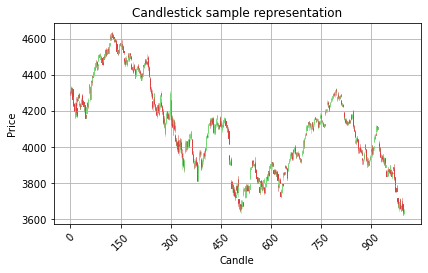

In [9]:
graph_data_ohlc(my_dataset.tail(1000).values)


In [10]:
def my_generator(data,lookback):
    final_output = []
    counter = 0
    first_row = 0
    arr = np.empty((1,lookback,4), int)
    for a in range(len(data)-lookback):
        temp_list = []
        for candle in data[first_row:first_row+lookback]:
            temp_list.append(candle)
        temp_list2 = np.asarray(temp_list)
        templist3 = [temp_list2]
        templist4 = np.asarray(templist3)
        arr = np.append(arr, templist4, axis=0)
        first_row=first_row+1
    return arr

In [11]:
cell_timer = MeasureTime()
three_dim_sequence = np.asarray(my_generator(my_dataset.values[1:],3))
cell_timer.kill()

Time elapsed: 00:00:00


Step 1


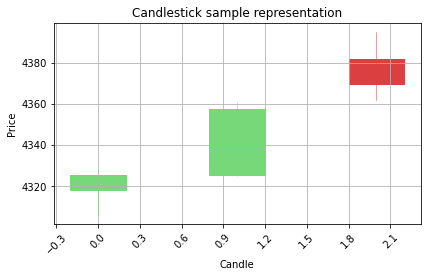

Step 2


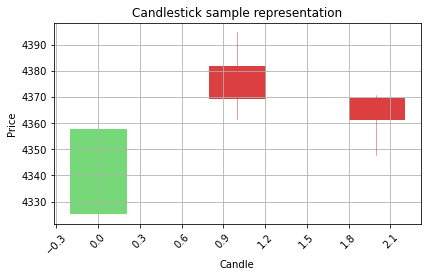

Step 3


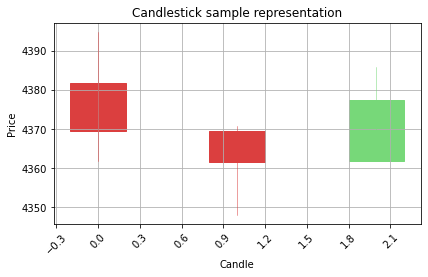

Step 4


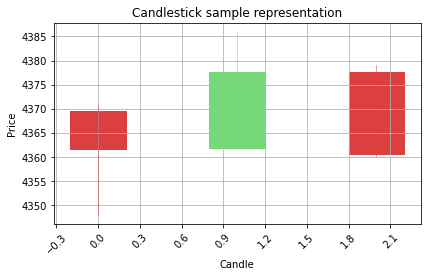

Step 5


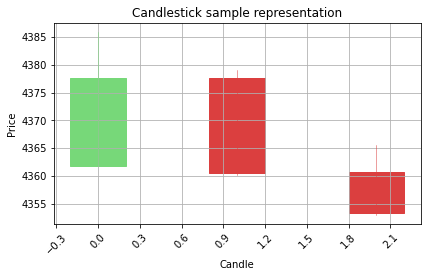

In [12]:
counter=0
for candle in three_dim_sequence[1000:1005]:
    counter=counter+1
    print('Step ' + str(counter))
    graph_data_ohlc(candle)

In [13]:
def ohlc_to_candlestick(conversion_array):
    candlestick_data = [0,0,0,0]

    if conversion_array[3]>conversion_array[0]:
        candle_type=1
        wicks_up=conversion_array[1]-conversion_array[3]
        wicks_down=conversion_array[2]-conversion_array[0]
        body_size=conversion_array[3]-conversion_array[0]

    else:
        candle_type=0
        wicks_up=conversion_array[1]-conversion_array[0]
        wicks_down=conversion_array[2]-conversion_array[3]
        body_size=conversion_array[1]-conversion_array[3]


    if wicks_up < 0:wicks_up=wicks_up*(-1)
    if wicks_down < 0:wicks_down=wicks_down*(-1)
    if body_size < 0:body_size=body_size*(-1)
    candlestick_data[0]=candle_type
    candlestick_data[1]=round(round(wicks_up,5)*10000,2)
    candlestick_data[2]=round(round(wicks_down,5)*10000,2)
    candlestick_data[3]=round(round(body_size,5)*10000,2)

    return candlestick_data

In [16]:
cell_timer = MeasureTime()
one_candle_data_ohlc=three_dim_sequence[1000:1010][5][1]
cell_timer.kill()

Time elapsed: 00:00:00


In [17]:
one_candle_data_ohlc


array([4360.68, 4365.61, 4352.9 , 4353.34])

In [18]:
one_candle_data_ohlc_candle=ohlc_to_candlestick(one_candle_data_ohlc)


In [19]:
one_candle_data_ohlc_candle


[0, 49300.0, 4400.0, 122700.0]

In [20]:
def my_generator_candle(data,lookback):
    first_row = 0
    arr = np.empty((1,lookback,4), int)
    for a in range(len(data)-lookback):
        temp_list = []
        for candle in data[first_row:first_row+lookback]:
            converted_data = ohlc_to_candlestick(candle)
            temp_list.append(converted_data)
        temp_list2 = np.asarray(temp_list)
        templist3 = [temp_list2]
        templist4 = np.asarray(templist3)
        arr = np.append(arr, templist4, axis=0)
        first_row=first_row+1
    return arr

In [21]:
three_dim_sequence_candle=my_generator_candle(my_dataset.values[1:],3)


In [22]:
three_dim_sequence_candle[5000:5005]


array([], shape=(0, 3, 4), dtype=float64)